# Gather

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set()

In [2]:
master = pd.read_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

## 1) Summary of the data

In [3]:
master.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1970.000000,1.970000e+03,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1.970000e+03,1.970000e+03
mean,985.382234,7.359915e+17,12.189213,10.455330,2765.079188,8951.266497,1.201015,0.594368,1.346469e-01,6.019253e-02
std,569.014399,6.750828e+16,41.609686,6.790808,4762.714170,12683.805328,0.557691,0.272066,1.010411e-01,5.094042e-02
min,0.000000,6.660209e+17,1.000000,7.000000,13.000000,80.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,493.250000,6.758593e+17,10.000000,10.000000,618.250000,1960.500000,1.000000,0.363008,5.351907e-02,1.612658e-02
50%,985.500000,7.088226e+17,11.000000,10.000000,1343.500000,4088.000000,1.000000,0.587635,1.173995e-01,4.945765e-02
75%,1477.750000,7.879824e+17,12.000000,10.000000,3177.000000,11255.500000,1.000000,0.847216,1.955693e-01,9.155482e-02
max,1970.000000,8.924206e+17,1776.000000,170.000000,78210.000000,144156.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


This shows most dogs were rated from 10 to 12, 11 being the median score.

## 2) Correlation of retweets and favorites
Now I'm going to see whether retweet and favorite numbers are correlated.

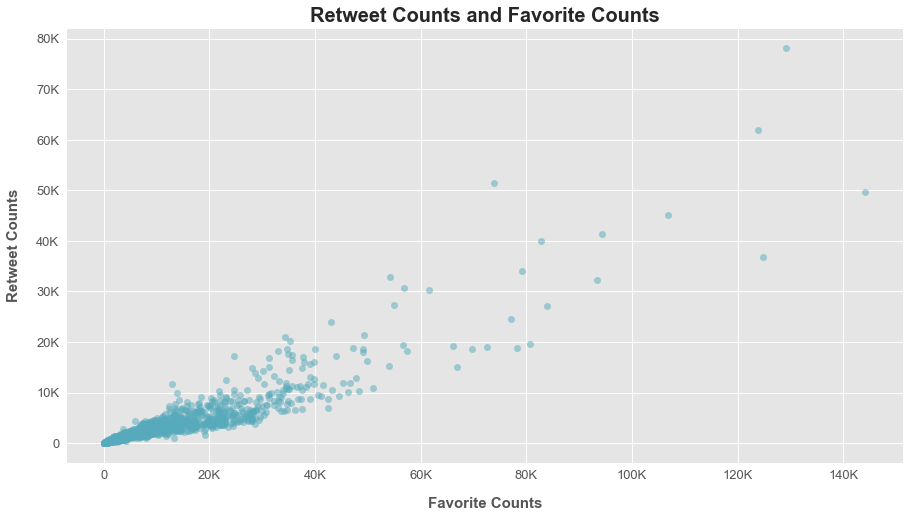

In [4]:
xticks_old = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000]
xticks_new = ['0', '20K', '40K', '60K', '80K', '100K', '120K', '140K']
yticks_old = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
yticks_new = ['0','10K','20K','30K','40K','50K','60K','70K','80K']

#using 'ggplot' as a base style
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(master.favorite_count, master.retweet_count, 'o', color='#57aabb', alpha=0.5, markersize=7)
plt.title('Retweet Counts and Favorite Counts',fontsize=20, fontweight='bold')
plt.xlabel('Favorite Counts',fontsize=15, labelpad=15, fontweight='bold')
plt.ylabel('Retweet Counts',fontsize=15, labelpad=15, fontweight='bold')
plt.xticks(xticks_old, xticks_new, fontsize=13)
plt.yticks(yticks_old, yticks_new, fontsize=13)
plt.show()
fig.savefig('RetweetCountsAndFavoriteCounts.png', dpi=fig.dpi)

And looks like they have a positive correlation with several outliers. While the favorite counts always seem to exceed the retweet counts, there is a positive correlation between retweet and favorite counts. 

## 3) Are certain stages of dogs posted more often than others?

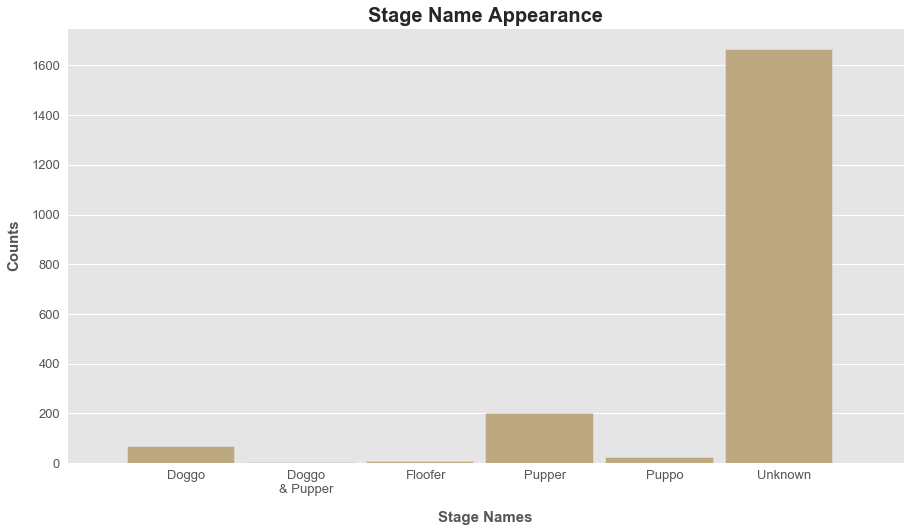

unknown         1667
pupper           202
doggo             67
puppo             23
floofer            7
doggo_pupper       4
Name: stage, dtype: int64

In [5]:
xticks_stage_old = ['doggo', 'doggo_pupper', 'floofer', 'pupper', 'puppo', 'unknown']
xticks_stage_new = ['Doggo', 'Doggo\n& Pupper', 'Floofer', 'Pupper', 'Puppo', 'Unknown']

fig, ax = plt.subplots(figsize=(15, 8))

plt.hist(master.stage, bins=range(7), color="#bda981", width=0.9, align='left', edgecolor='#e5e5e5')
plt.title('Stage Name Appearance',fontsize=20, fontweight='bold')
plt.xlabel('Stage Names',fontsize=15, labelpad=15, fontweight='bold')
plt.ylabel('Counts',fontsize=15, labelpad=10, fontweight='bold')
ax.set_xlim(-1,6)
ax.xaxis.grid(False)
plt.xticks(xticks_stage_old, xticks_stage_new, fontsize=13)
plt.yticks(fontsize=13)

plt.show()
fig.savefig('StageNameAppearance.png', dpi=fig.dpi)
master.stage.value_counts()

Seems like majority of posts did not mention the stages of the dogs, but betweens the ones that did get mentioned, puppers were mentioned the most, followed by doggos. 

## 4) Retweets and favorites by stages
Here, I'm checking to see if certain stages of dogs collected more retweets and favorites on average. 

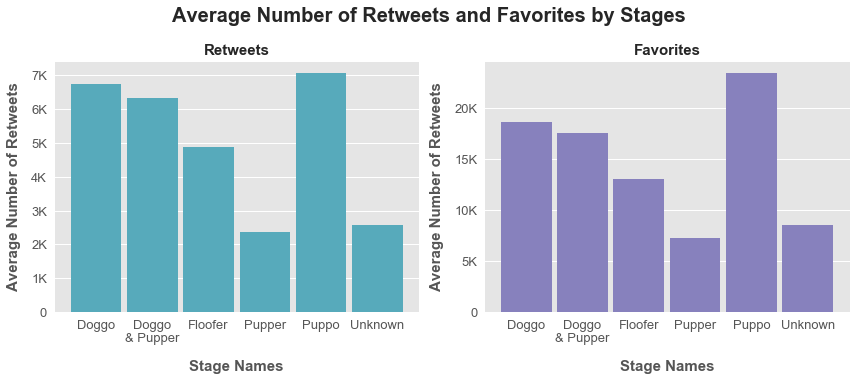

In [6]:
yticks_retw_old = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
yticks_retw_new = ['0','1K','2K','3K','4K','5K','6K','7K']
yticks_fav_old = [0, 5000, 10000, 15000, 20000]
yticks_fav_new = ['0','5K','10K','15K','20K']

# Calculating the mean of retweets in each stage 
retweet_by_stage = master.groupby('stage')['retweet_count'].mean()
favorite_by_stage = master.groupby('stage')['favorite_count'].mean()

fig = plt.figure(figsize=(12, 5))
plt.suptitle('Average Number of Retweets and Favorites by Stages', fontsize=20, fontweight='bold', y=1.05)

ax1 = fig.add_subplot(121)
plt.bar(retweet_by_stage.index, retweet_by_stage, color='#57aabb', width = 0.9)
ax1.set_title('Retweets', fontsize=15, fontweight='bold')
plt.xlabel('Stage Names', fontsize=15, labelpad=15, fontweight='bold')
plt.ylabel('Average Number of Retweets', fontsize=15, labelpad=10, fontweight='bold')
plt.xticks(xticks_stage_old, xticks_stage_new, fontsize=13)
plt.yticks(yticks_retw_old, yticks_retw_new, fontsize=13)
ax1.xaxis.grid(False)

ax2 = fig.add_subplot(122)
ax2.set_title('Favorites', fontsize=15, fontweight='bold')
plt.bar(favorite_by_stage.index, favorite_by_stage, color='#8781bd',  width = 0.9)
plt.xlabel('Stage Names', fontsize=15, labelpad=15, fontweight='bold')
plt.ylabel('Average Number of Retweets', fontsize=15, labelpad=10, fontweight='bold')
plt.xticks(xticks_stage_old, xticks_stage_new, fontsize=13)
plt.yticks(yticks_fav_old, yticks_fav_new, fontsize=13)
ax2.xaxis.grid(False)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
fig.savefig('AverageRetweetsFavoritesByStages.png', dpi=fig.dpi)

The most retweeted and favorited were puppos followed by doggos. In favorited numbers, poppos stand out slightly more from the rest of the crowd. Overall, it seems like a post collects more retweets and favorites when the stage name is mentioned.

## 5) Popular breeds

In [7]:
# Calculating the sum of retweets in predicted breed
popular_breeds = master.groupby('p1')['retweet_count'].sum().sort_values(ascending=False)
popular_breeds10 = popular_breeds[:10]

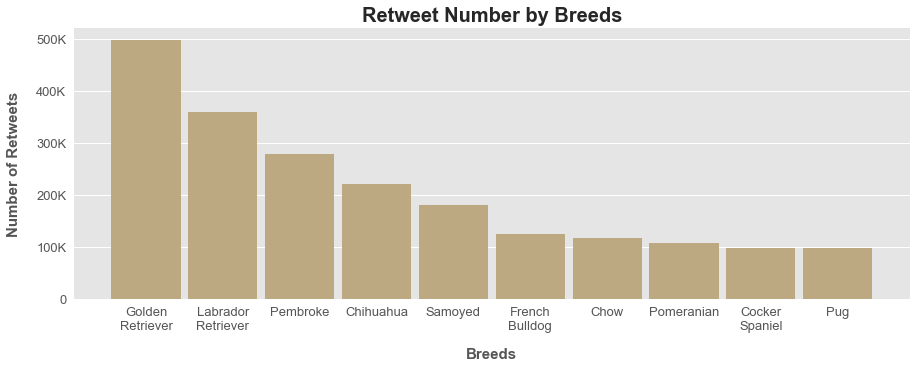

In [8]:
number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
breeds = ['Golden\nRetriever', 'Labrador\nRetriever', 'Pembroke', 'Chihuahua', 
          'Samoyed', 'French\nBulldog', 'Chow', 'Pomeranian', 'Cocker\nSpaniel', 'Pug']
yticks_old = [0, 100000, 200000, 300000, 400000, 500000]
yticks_new = ['0','100K','200K','300K','400K', '500K']

fig, ax = plt.subplots(figsize=(15,5))

plt.bar(number, popular_breeds10, color="#bda981", width = 0.9)
plt.title('Retweet Number by Breeds', fontsize=20, fontweight='bold')
plt.xlabel('Breeds', fontsize=15, labelpad=15, fontweight='bold')
plt.ylabel('Number of Retweets', fontsize=15, labelpad=15, fontweight='bold')
plt.xticks(number, breeds, fontsize=13)
plt.yticks(yticks_old, yticks_new, fontsize=13)
ax.xaxis.grid(False)
plt.show()
fig.savefig('RetweetNumberByBreeds.png', dpi=fig.dpi)

This shows Golden Retriever is the most retweeted breed. 

## 6) Correlation of rates and popularity

In [9]:
rating15 = master[master.rating_numerator < 15]
rating15NO = master[(master.rating_numerator < 15) & (master.retweet_count < 7000)]

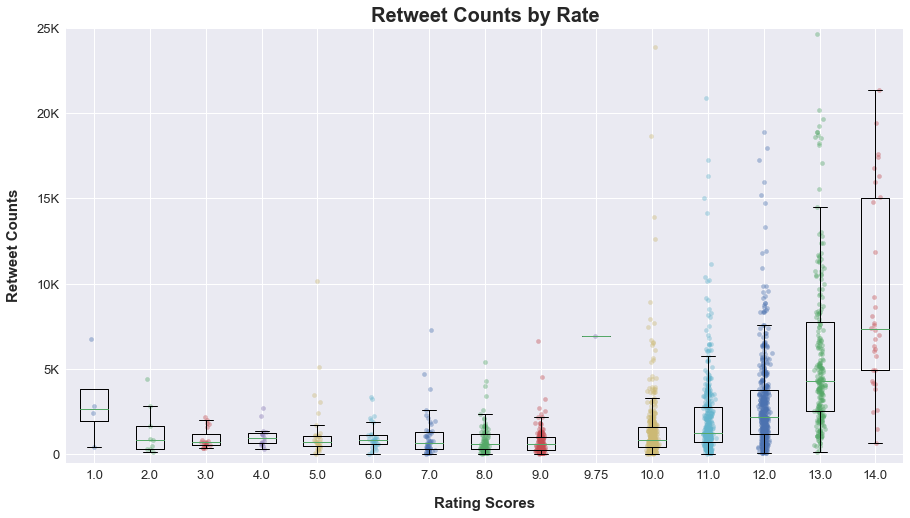

In [12]:
yticks_old = [0, 5000, 10000, 15000, 20000, 25000]
yticks_new = ['0','5K','10K','15K','20K', '25K']

# Source: https://stackoverflow.com/questions/29779079/adding-a-scatter-of-points-to-a-boxplot-using-matplotlib
group = 'rating_numerator'
column = 'retweet_count'
grouped = rating15.groupby(group)

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

fig = plt.figure(figsize=(15,8))
plt.boxplot(vals, labels=names)
plt.title('Retweet Counts by Rate', fontsize=20, fontweight='bold')
plt.xlabel('Rating Scores', fontsize=15, labelpad=15, fontweight='bold')
plt.ylabel('Retweet Counts', fontsize=15, labelpad=15, fontweight='bold')
plt.ylim(ymin=-500)
plt.ylim(ymax=25000)
plt.xticks(fontsize=13)
plt.yticks(yticks_old, yticks_new, fontsize=13)
ngroup = len(vals)
clevels = np.linspace(0., 1., ngroup)

for x, val, clevel in zip(xs, vals, clevels):
    plt.scatter(x, val, alpha=0.4, s=18)
    
fig.savefig('RetweetCountsByRate.png', dpi=fig.dpi)

I can see that between 10 and 14, the higher the rating, the more retweets these posts tend to get. According to the summary of the data, the rating numbers range from 1 to 1776, but most dogs are rated between 10 to 12 out of 10 as the denominator. Although there seems to be no obvious rules on how dogs are being rated, however, The plot above shows higher scores tend to attract the followers attention. 